### Importação dos dados



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [13]:
faturamento_loja = sum(loja["Preço"])
faturamento_loja2 = sum(loja2["Preço"])
faturamento_loja3 = sum(loja3["Preço"])
faturamento_loja4 = sum(loja4["Preço"])


In [14]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento_lojas = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]



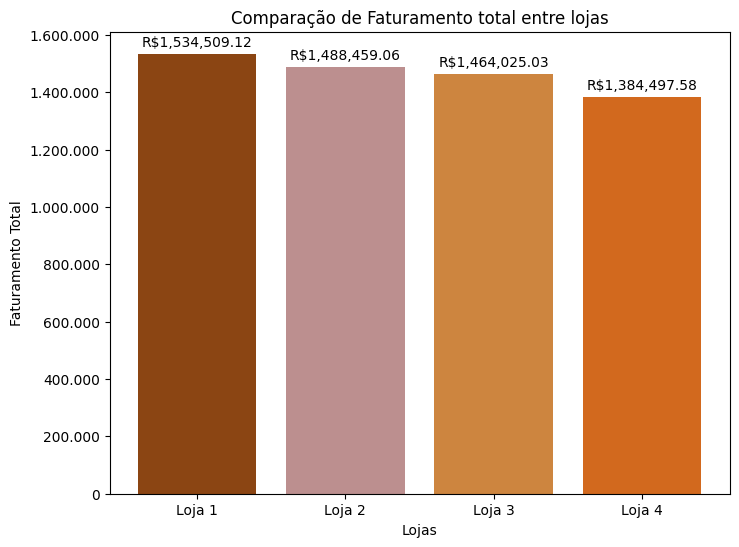

📊 Loja 1 = Faturamento de R$1,534,509.12
📊 Loja 2 = Faturamento de R$1,488,459.06
📊 Loja 3 = Faturamento de R$1,464,025.03
📊 Loja 4 = Faturamento de R$1,384,497.58


In [33]:
plt.figure(figsize=(8, 6))
plt.bar(lojas, faturamento_lojas, color=["#8B4513", "#BC8F8F", "#CD853F", "#D2691E"])
for i, valor in enumerate(faturamento_lojas):
    plt.text(i, valor + (valor * 0.01), f'R${valor:,.2f}', ha='center', va='bottom')
plt.xticks(lojas)
plt.ylabel("Faturamento Total")
plt.xlabel("Lojas")
plt.title("Comparação de Faturamento total entre lojas")
formatar_valores_faturamento = FuncFormatter(lambda valor, pos: f'{int(valor):,}'.replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatar_valores_faturamento)

plt.show()

for i in range (0,4):
    print(f"📊 {lojas[i]} = Faturamento de R${faturamento_lojas[i]:,.2f}")


# 2. Vendas por Categoria


In [17]:
categorias_lojas = pd.concat([loja["Categoria do Produto"], loja2["Categoria do Produto"], loja3["Categoria do Produto"], loja4["Categoria do Produto"]])
categorias_existentes = categorias_lojas.unique()


In [18]:
def contar_qntd_vendas_categorias(loja):
    categorias_e_qntd_vendas = {}
    for categoria in categorias_existentes: # laço de repetição para cada categoria que existe
        total_vendas_categoria = loja[loja["Categoria do Produto"] == categoria]["Categoria do Produto"].count() # Separando os itens por categoria e contando
        categorias_e_qntd_vendas[categoria] = int(total_vendas_categoria) # atribuindo valor ao dicionário criado com a categoria e qntd total de vendas da loja
    return categorias_e_qntd_vendas

In [19]:
qntd_vendas_categorias_loja = contar_qntd_vendas_categorias(loja)
qntd_vendas_categorias_loja2 = contar_qntd_vendas_categorias(loja2)
qntd_vendas_categorias_loja3 = contar_qntd_vendas_categorias(loja3)
qntd_vendas_categorias_loja4 = contar_qntd_vendas_categorias(loja4)

valores_loja1 = [qntd_vendas_categorias_loja.get(categoria) for categoria in categorias_existentes]
valores_loja2 = [qntd_vendas_categorias_loja2.get(categoria) for categoria in categorias_existentes]
valores_loja3 = [qntd_vendas_categorias_loja3.get(categoria) for categoria in categorias_existentes]
valores_loja4 = [qntd_vendas_categorias_loja4.get(categoria) for categoria in categorias_existentes]


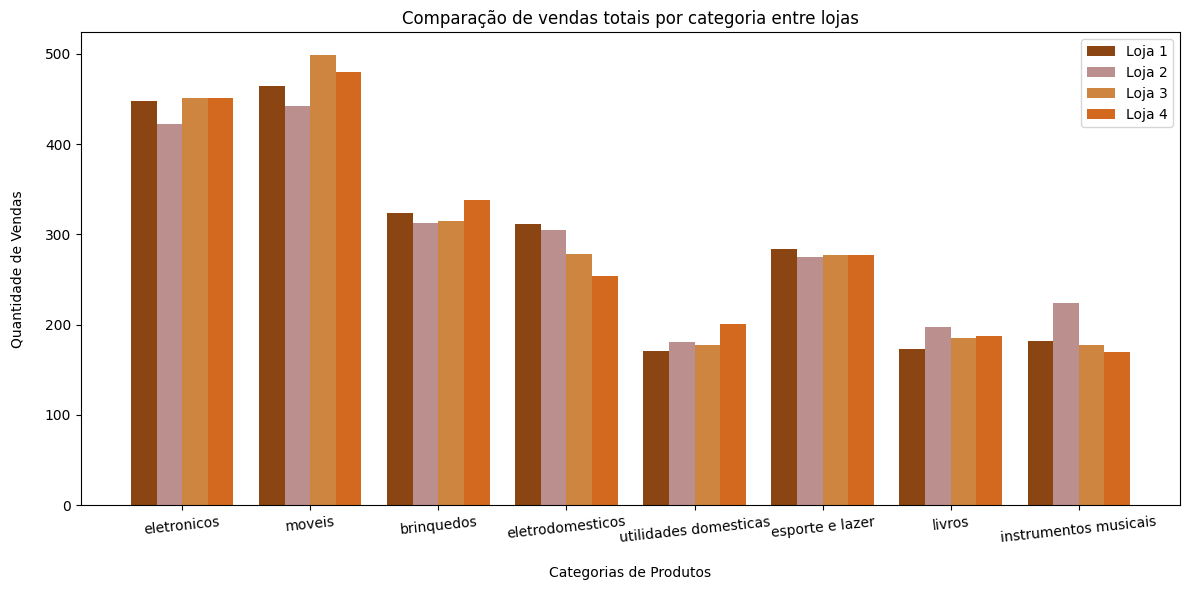


📊 ELETRONICOS
Loja 1: 448
Loja 2: 422
Loja 3: 451
Loja 4: 451

📊 MOVEIS
Loja 1: 465
Loja 2: 442
Loja 3: 499
Loja 4: 480

📊 BRINQUEDOS
Loja 1: 324
Loja 2: 313
Loja 3: 315
Loja 4: 338

📊 ELETRODOMESTICOS
Loja 1: 312
Loja 2: 305
Loja 3: 278
Loja 4: 254

📊 UTILIDADES DOMESTICAS
Loja 1: 171
Loja 2: 181
Loja 3: 177
Loja 4: 201

📊 ESPORTE E LAZER
Loja 1: 284
Loja 2: 275
Loja 3: 277
Loja 4: 277

📊 LIVROS
Loja 1: 173
Loja 2: 197
Loja 3: 185
Loja 4: 187

📊 INSTRUMENTOS MUSICAIS
Loja 1: 182
Loja 2: 224
Loja 3: 177
Loja 4: 170


In [32]:
x = np.arange(len(categorias_existentes))
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*0.2, valores_loja1, width=0.2, label='Loja 1', color='#8B4513')
plt.bar(x - 0.5*0.2, valores_loja2, width=0.2, label='Loja 2', color='#BC8F8F')
plt.bar(x + 0.5*0.2, valores_loja3, width=0.2, label='Loja 3', color='#CD853F')
plt.bar(x + 1.5*0.2, valores_loja4, width=0.2, label='Loja 4', color='#D2691E')
plt.xlabel("Categorias de Produtos", labelpad=15)
plt.ylabel("Quantidade de Vendas", labelpad=15)
plt.title("Comparação de vendas totais por categoria entre lojas")
plt.xticks(x, categorias_existentes, rotation=6)
plt.legend()
plt.tight_layout()
plt.show()

for i, categoria in enumerate(categorias_existentes):
    print(f"\n📊 {categoria.upper()}")
    print(f"Loja 1: {valores_loja1[i]}")
    print(f"Loja 2: {valores_loja2[i]}")
    print(f"Loja 3: {valores_loja3[i]}")
    print(f"Loja 4: {valores_loja4[i]}")


# 3. Média de Avaliação das Lojas

In [22]:
def calcular_media_avaliacao_geral(loja):
    soma_avaliacoes = 0
    qntd_avaliacoes = 0
    for avaliacao in loja["Avaliação da compra"]:
        soma_avaliacoes += avaliacao
        qntd_avaliacoes += 1
    media_avaliacao = soma_avaliacoes / qntd_avaliacoes
    media_avaliacao = round(media_avaliacao, 2)
    return media_avaliacao


In [23]:
avaliacao_loja = calcular_media_avaliacao_geral(loja)
avaliacao_loja2 = calcular_media_avaliacao_geral(loja2)
avaliacao_loja3 = calcular_media_avaliacao_geral(loja3)
avaliacao_loja4 = calcular_media_avaliacao_geral(loja4)

# Colocando em uma lista para criar o gráfico
avaliacoes_lojas = [avaliacao_loja, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]


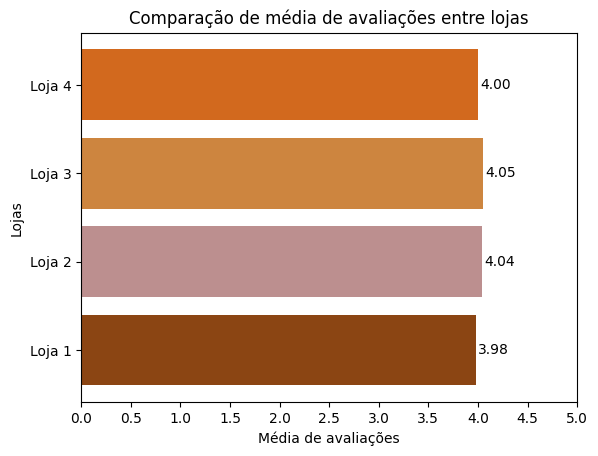

📊Loja 1 = Média de 3.98
📊Loja 2 = Média de 4.04
📊Loja 3 = Média de 4.05
📊Loja 4 = Média de 4.0


In [31]:
for i, valor in enumerate(avaliacoes_lojas):
    plt.xlim(0, 5)
    plt.xticks(np.arange(0, 5.5, 0.5))
    plt.text(valor + 0.02, i, f"{valor:.2f}", va='center', color='black', fontsize=10)
plt.barh(lojas, avaliacoes_lojas, color=["#8B4513", "#BC8F8F", "#CD853F", "#D2691E"])
plt.ylabel("Lojas")
plt.xlabel("Média de avaliações")
plt.title("Comparação de média de avaliações entre lojas")
plt.show()

# Exibir informações
for i, avaliacao in enumerate(avaliacoes_lojas):
    print(f"📊Loja {i+1} = Média de {avaliacao}")



# 4. Produtos Mais e Menos Vendidos

In [25]:
def filtrar_produto_mais_e_menos_vendido(loja):
    produto_mais_vendido = loja["Produto"].value_counts().idxmax()
    qntd_produto_mais_vendido = loja['Produto'].value_counts().max()

    produto_menos_vendido = loja["Produto"].value_counts().idxmin()
    qntd_produto_menos_vendido = loja['Produto'].value_counts().min()
    return (produto_mais_vendido, qntd_produto_mais_vendido, produto_menos_vendido, qntd_produto_menos_vendido)

# Aplicando a função para cada loja
produto_mais_vendido_loja, qntd_produto_mais_vendido, produto_menos_vendido_loja, qntd_produto_menos_vendido = filtrar_produto_mais_e_menos_vendido(loja)
produto_mais_vendido_loja2, qntd_produto_mais_vendido2, produto_menos_vendido_loja2, qntd_produto_menos_vendido2 = filtrar_produto_mais_e_menos_vendido(loja2)
produto_mais_vendido_loja3, qntd_produto_mais_vendido3, produto_menos_vendido_loja3, qntd_produto_menos_vendido3 = filtrar_produto_mais_e_menos_vendido(loja3)
produto_mais_vendido_loja4, qntd_produto_mais_vendido4, produto_menos_vendido_loja4, qntd_produto_menos_vendido4 = filtrar_produto_mais_e_menos_vendido(loja4)

# Colocando os dados dentro de uma lista (para colocar no gráfico)
produtos_mais_vendidos = [produto_mais_vendido_loja, produto_mais_vendido_loja2, produto_mais_vendido_loja3, produto_mais_vendido_loja4]
qtds_mais_vendidos = [qntd_produto_mais_vendido, qntd_produto_mais_vendido2, qntd_produto_mais_vendido3, qntd_produto_mais_vendido4]
produtos_menos_vendidos = [produto_menos_vendido_loja, produto_menos_vendido_loja2, produto_menos_vendido_loja3, produto_menos_vendido_loja4]
qtds_menos_vendidos = [qntd_produto_menos_vendido, qntd_produto_menos_vendido2, qntd_produto_menos_vendido3, qntd_produto_menos_vendido4]



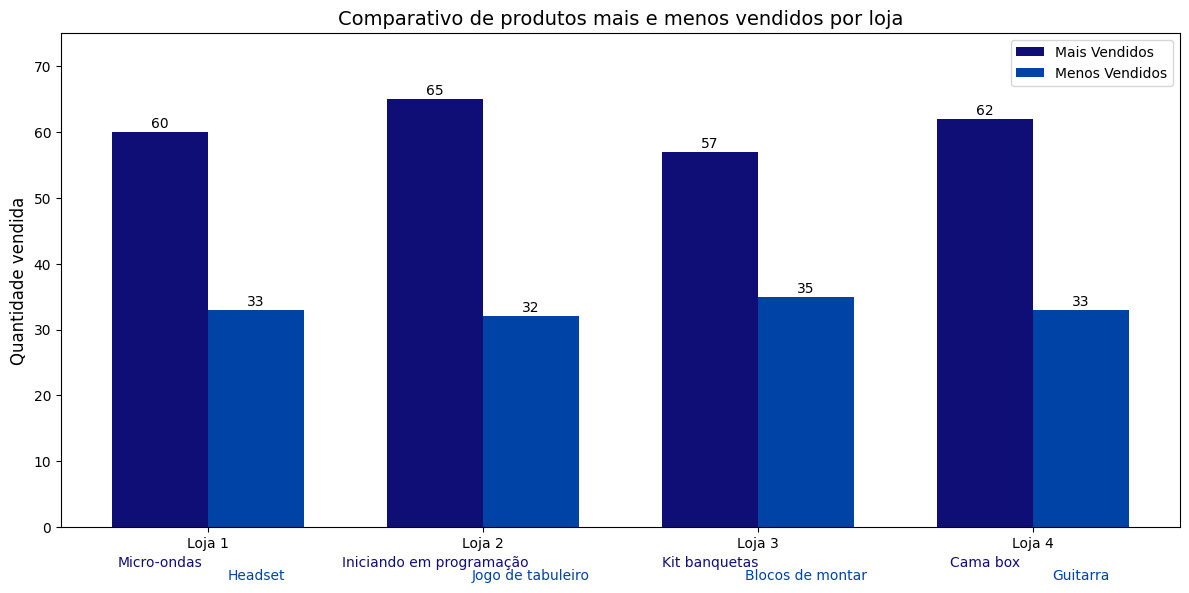

📊 Loja 1
Produto mais vendido: Micro-ondas - 60.
Produto menos vendido: Headset - 33.

📊 Loja 2
Produto mais vendido: Iniciando em programação - 65.
Produto menos vendido: Jogo de tabuleiro - 32.

📊 Loja 3
Produto mais vendido: Kit banquetas - 57.
Produto menos vendido: Blocos de montar - 35.

📊 Loja 4
Produto mais vendido: Cama box - 62.
Produto menos vendido: Guitarra - 33.



In [29]:
x = np.arange(len(lojas))
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0, 75)
barras_mais = ax.bar(x - 0.35/2, qtds_mais_vendidos, 0.35, label='Mais Vendidos', color='#0E0E76')
barras_menos = ax.bar(x + 0.35/2, qtds_menos_vendidos, 0.35, label='Menos Vendidos', color='#0043A6')
ax.bar_label(barras_mais, labels=qtds_mais_vendidos, fontsize=10, label_type='edge', padding=1)
ax.bar_label(barras_menos, labels=qtds_menos_vendidos, fontsize=10, label_type='edge', padding=1)
for i, barra in enumerate(barras_mais):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() - barra.get_height() - 6,
            produtos_mais_vendidos[i], fontsize=10, color='#0E0E76', ha='center')
for i, barra in enumerate(barras_menos):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() - barra.get_height() - 8,
            produtos_menos_vendidos[i], fontsize=10, color='#0043A6', ha='center')
ax.set_title("Comparativo de produtos mais e menos vendidos por loja", fontsize=14)
ax.set_ylabel("Quantidade vendida", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()
plt.tight_layout()
plt.show()

# Exibindo as informações obtidas por escrito
for i in range (0,4):
    print(f"📊 Loja {i+1}")
    print(f"Produto mais vendido: {produtos_mais_vendidos[i]} - {qtds_mais_vendidos[i]}.")
    print(f"Produto menos vendido: {produtos_menos_vendidos[i]} - {qtds_menos_vendidos[i]}.\n")



# 5. Frete Médio por Loja


In [39]:
def calcular_frete_medio(loja):
    total = 0
    pedidos = []
    for frete in loja["Frete"]:
        pedidos.append(frete)
        total += frete
    frete_medio = round((total / len(pedidos)), 2)
    return frete_medio

frete_loja = calcular_frete_medio(loja)
frete_loja2 = calcular_frete_medio(loja2)
frete_loja3 = calcular_frete_medio(loja3)
frete_loja4 = calcular_frete_medio(loja4)

frete_lojas = [frete_loja, frete_loja2, frete_loja3, frete_loja4]



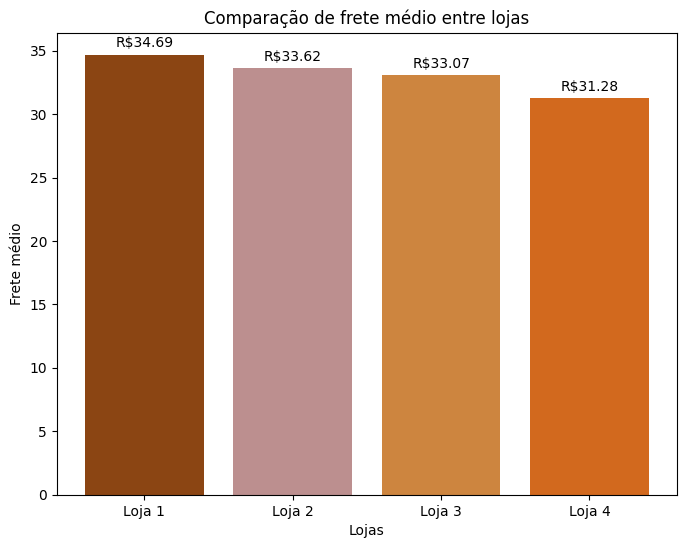

📊 Loja 1 = Frete Médio de R$34.69.
📊 Loja 2 = Frete Médio de R$33.62.
📊 Loja 3 = Frete Médio de R$33.07.
📊 Loja 4 = Frete Médio de R$31.28.


In [40]:
plt.figure(figsize=(8, 6))
plt.bar(lojas, frete_lojas, color=["#8B4513", "#BC8F8F", "#CD853F", "#D2691E"])
plt.xticks(lojas)
plt.ylabel("Frete médio")
plt.xlabel("Lojas")
plt.title("Comparação de frete médio entre lojas")
for i, valor in enumerate(frete_lojas):
    plt.text(i, valor + (valor * 0.01), f'R${valor:,.2f}', ha='center', va='bottom')
formatar_valores_faturamento = FuncFormatter(lambda valor, pos: f'{int(valor):,}'.replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatar_valores_faturamento)
plt.show()

# Exibindo as informações por escrito
for i, loja in enumerate(frete_lojas):
    print(f"📊 Loja {i+1} = Frete Médio de R${loja}.")

